In [9]:
# Alvin Pane 1004281118
# MIE1626
# Project 2 Sentiment Analysis
# November 28, 2022

In [10]:
skip = True #introduce skip boolean, we will use this to suppress the output of certain sections

#Note that since import NTLK command was not working on my local machine, Google Colab was used for Section 1, 
#before switching over to VS code on local machine for the remaining sections

In [11]:
if not skip:
    from google.colab import files
    # upload Canada_elections_2021.csv
    uploaded = files.upload()

In [12]:
if not skip:
    # upload sentiment_analysis.csv
    uploaded = files.upload()

In [13]:
if not skip:
    from google.colab import drive

    drive.mount('/M')

In [14]:
# Basic basic package to handle data.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 # 0. Data Imported

In [15]:
# import sentiment_analysis.csv as df_sa
df_sa = pd.read_csv('sentiment_analysis.csv',low_memory=False)
print("Shape of sentiment_analysis.csv: ",df_sa.shape)
# 0 stands for negative and 1 stands for positive
# ID is useless in this sentiment analysis, so we drop this column
df_sa = df_sa[['text','label']]
print("Revised Shape of sentiment_analysis.csv: ",df_sa.shape)
df_sa.head()

Shape of sentiment_analysis.csv:  (550391, 3)
Revised Shape of sentiment_analysis.csv:  (550391, 2)


,text,label
0,Josh Jenkins is looking forward to TAB Breeder...,1
1,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,"RT @PEPalerts: This September, @YESmag is taki...",1
3,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,RT @CedricFeschotte: Excited to announce: as o...,1


In [16]:
#@title Default title text
# import Canadian_elections_2021.csv as df_ce
df_ce = pd.read_csv('Canadian_elections_2021.csv',low_memory=False)
print("Shape of Canadian_elections_2021.csv: ",df_ce.shape)
df_ce.head(10)

Shape of Canadian_elections_2021.csv:  (1002, 3)


,text,sentiment,negative_reason
0,The Canadian election is a power grab by PM Tr...,negative,calling election early
1,I do hope Trudeau loses the Canadian election ...,negative,covid
2,"Dear Canadians, This election is a test of how...",positive,NaN
3,Canadian friends: Never forget that Trudeau ha...,negative,calling election early
4,Sorry @theJagmeetSingh I have voted #NDP all m...,positive,NaN
5,Vaccines &amp; guns are key this election beca...,negative,covid
6,"I’m sorry, moderators can respond but leadersh...",negative,others
7,I have to say this. I've been skeptical and cr...,negative,others
8,If Canadians #VotePPC and support @MaximeBerni...,positive,NaN
9,Justin Trudeau literally had rocks thrown at h...,positive,NaN


# **1. Data cleaning (12 Marks)**  
The tweets, as given, are not in a form amenable to analysis – there is too much ‘noise’.  
Therefore, the first step is to “clean” the data. Design a procedure that prepares the Twitter data for analysis by satisfying the requirements below. Remember to use the same pipeline for both datasets.

*   All html tags and attributes (i.e., /<[^>]+>/) are removed.
*   Html character codes (i.e., &...;) are replaced with an ASCII equivalent.
*   All URLs are removed.
*   All characters in the text are in lowercase.
*   All stop words are removed. Be clear in what you consider as a stop word.
*   If a tweet is empty after pre-processing, it should be preserved as such.





In [17]:
# Import Data Cleaning related package
import re
import html
#!pip install contractions
import contractions
if not skip:  #skip to avoid error messages when producing final result on VS code
    import nltk
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('wordnet')
    nltk.download('omw-1.4')


    from nltk.stem import PorterStemmer
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize

In [18]:
#Text Processing Pipeline

if not skip: #skip to suppress NTLK error messages

    def process_text(text):

        remove_stopwords=True
        
        #Replace HTML Character Codes
        text = html.unescape(text)

        # Convert words to lower case
        text = text.lower()

        #print(text)
        #BONUS, remove contractions
        text=contractions.fix(r"{}".format(text))
        
        #print(text)

        #Remove HTML Tags /<[^>]+>/ and unwanted chars, remove urls

        text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
        text = re.sub(r'\<a href', ' ', text)
        text = re.sub(r'&amp;', '', text) 
        text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
        text = re.sub(r'<br />', ' ', text)
        text = re.sub(r'\'', ' ', text)
        
        #print(text)
        # remove stopwords
        if remove_stopwords:
            text = text.split()
            stop_words = set(stopwords.words("english"))
            text = [w for w in text if not w in stop_words]
            text = " ".join(text)

        # BONUS, Lemmatize each word (use only the root)
        lemm = nltk.stem.WordNetLemmatizer()
        if True:
                text = text.split()
                new_text = []
                for word in text:
                    word = lemm.lemmatize(word)
                    new_text.append(word)
                text = " ".join(new_text)
        #print(text)

        # Tokenize each word
        #text =  nltk.WordPunctTokenizer().tokenize(text)
        
        return text

In [19]:
if not skip: #skip to avoid NTLK error, this part was pre-done on Google Colab

    #Process DF CE
    for i,row in enumerate(df_ce['text']):
        df_ce['text'][i] = process_text(df_ce['text'][i])

In [20]:
if not skip: #skip to avoid NTLK error, this part was pre-done on Google Colab

    #Repeat for other DF
    for i,row in enumerate(df_sa['text']):
        df_sa['text'][i] = process_text(df_sa['text'][i])

In [21]:
if not skip: #this part was pre-done on Google Colab 

    #save new df_sa for next time as it takes very long to process text

    df_sa.to_csv('df_sa_processed.csv') 
    files.download('df_sa_processed.csv') 

In [22]:
#Load our pre-processed data (obtained from Colab) to save processing time in subsequent sections
df_ce = pd.read_csv('df_ce_processed.csv',low_memory=False)
df_sa = pd.read_csv('df_sa_processed.csv',low_memory=False)


# **2. Exploratory analysis (15 marks)**  
1. Design a simple procedure that determines the political party (Liberal, Conservative, New Democratic Party (NDP), The People's Party of Canada (PPC)) of a given tweet and apply this procedure to all the tweets in the Canadian Elections dataset. A suggestion would be to look at relevant words and hashtags in the tweets that identify to certain political parties or candidates. What can you say about the distribution of the political affiliations of the tweets?  

2. Present a graphical figure (e.g. chart, graph, histogram, boxplot, word cloud, etc.) that visualizes some aspect of the generic tweets in sentiment_analysis.csv and another figure for the 2021 Canadian Elections tweets. All graphs and plots should be readable and have all axes that are appropriately labelled. Discuss your findings.

In [23]:
# import package related to Exploratory analysis
#!pip install wordcloud
#!pip install -U scikit-learn
from wordcloud import WordCloud
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
# your code start from here.

#Initialize DF Columns to Denote Party of a tweet
df_ce['Liberal'] = np.zeros(len(df_ce))
df_ce['Conservative'] = np.zeros(len(df_ce))
df_ce['NDP'] = np.zeros(len(df_ce))
df_ce['PPC'] = np.zeros(len(df_ce))

#define words used to identify which parties a tweet is referencing 
liberal_words = ['liberal', 'voteliberal','liberals','trudeau', 'justintrudeau','red','justin']
conservative_words = ['conservative','conservatives', 'erin','erinotoole','voteconservative','otoole','blue','cpc_hq',"o'toole"]
ndp_words = ['ndp','votendp','jagmeet','singh','thejagmeetsingh']
ppc_words = ['ppc', 'voteppc','maxime','bernier','maximebernier']

for i,tweet in enumerate(df_ce['text']):
  for word in tweet.split():
    if word in liberal_words:
      df_ce['Liberal'][i] = 1
    if word in conservative_words:
      df_ce['Conservative'][i] = 1
    if word in ndp_words:
      df_ce['NDP'][i] = 1
    if word in ppc_words:
      df_ce['PPC'][i] = 1

df_ce.head()

C:\Users\alvipane\AppData\Local\Temp\ipykernel_27416\635186281.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ce['Liberal'][i] = 1
C:\Users\alvipane\AppData\Local\Temp\ipykernel_27416\635186281.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ce['NDP'][i] = 1
C:\Users\alvipane\AppData\Local\Temp\ipykernel_27416\635186281.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ce['PPC'][i] = 1
C:\Users\alvipane\AppData\L

,Unnamed: 0,text,sentiment,negative_reason,Liberal,Conservative,NDP,PPC
0,0,canadian election power grab pm trudeau yes ta...,negative,calling election early,1.0,0.0,0.0,0.0
1,1,hope trudeau loses canadian election tomorrow ...,negative,covid,1.0,0.0,0.0,0.0
2,2,dear canadian election test progressive whethe...,positive,NaN,0.0,0.0,0.0,0.0
3,3,canadian friend never forget trudeau 2 year ma...,negative,calling election early,1.0,0.0,0.0,0.0
4,4,sorry thejagmeetsingh voted ndp life election ...,positive,NaN,0.0,0.0,1.0,1.0


In [25]:
#Prepare df_sa to produce a visual analysis

#We are going to look at the positive and negative tweets in df_sa, and create a wordcloud for each label, to see what are the words
#which are most common in each type of tweet

pos_df = df_sa[df_sa['label']==1]
neg_df = df_sa[df_sa['label']==0]


Tweet Distribution by Party Reference, DF_CE
The percentage of classified tweets referencing the liberal party:
47.423764458464774
The percentage of classified tweets referencing the conservative party:
33.753943217665615
The percentage of classified tweets referencing the ndp party:
7.886435331230284
The percentage of classified tweets referencing the ppc party:
10.935856992639327


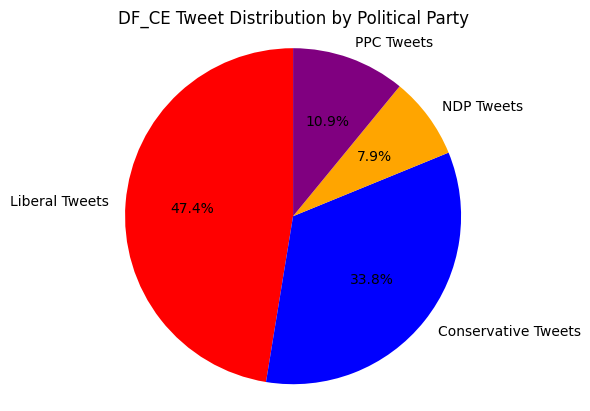

The majority of tweets reference the liberal party, followed by the conservative party, ppc, and ndp. Something interesting of note is that this tweet distribution roughly represents the seat distribution of the actual results of the 2021 election, with the exception of the PPC's popularity. Perhaps there might be some correlation between a party's popularity on twitter, and polling results. We clearly see the most popular parties get referenced in the most tweets.


In [26]:
#Break about df_ce by party tweet to see the tweet distribution by party, produce a visual, and comment on the distribution

lib_df = df_ce[df_ce['Liberal'] == 1]
#print(len(lib_df))

cons_df = df_ce[df_ce['Conservative'] == 1]
#print(len(cons_df))

ndp_df = df_ce[df_ce['NDP'] == 1]
#print(len(ndp_df))

ppc_df = df_ce[df_ce['PPC'] == 1]
#print(len(ppc_df))

classified_tweets = len(lib_df) + len(cons_df) + len(ndp_df) + len(ppc_df)
#print(classified_tweets)

print("\nTweet Distribution by Party Reference, DF_CE")
print("The percentage of classified tweets referencing the liberal party:")
print(len(lib_df)/classified_tweets *100)
print("The percentage of classified tweets referencing the conservative party:")
print(len(cons_df)/classified_tweets *100)
print("The percentage of classified tweets referencing the ndp party:")
print(len(ndp_df)/classified_tweets *100)
print("The percentage of classified tweets referencing the ppc party:")
print(len(ppc_df)/classified_tweets *100)

plt.pie([len(lib_df),len(cons_df),len(ndp_df),len(ppc_df) ],labels=['Liberal Tweets','Conservative Tweets', 'NDP Tweets', 'PPC Tweets'], colors=['red','blue','orange','purple'], startangle=90, autopct='%1.1f%%')
plt.title('DF_CE Tweet Distribution by Political Party')
plt.axis('equal')

plt.show()

print("The majority of tweets reference the liberal party, followed by the conservative party, ppc, and ndp. Something interesting of note is that this tweet distribution roughly represents the seat distribution of the actual results of the 2021 election, with the exception of the PPC's popularity. Perhaps there might be some correlation between a party's popularity on twitter, and polling results. We clearly see the most popular parties get referenced in the most tweets.")




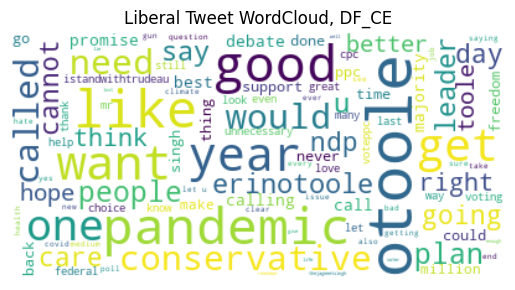

In [27]:
#BONUS, produce a visual wordcloud for the liberal tweets in the df, what are the most popular liberal words?

text = (" ").join(tweet for tweet in lib_df.text)
sw=['canada','win','country','cdnpoli','s', 'pm','government','vote','voted','canadians','canadian','election','elxn44','party',"n't",'','rt']

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(stopwords=liberal_words+sw,max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.title('Liberal Tweet WordCloud, DF_CE')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



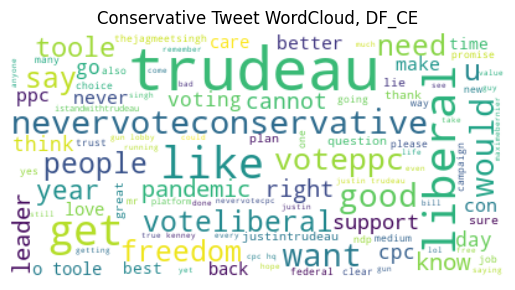

In [28]:
#BONUS, produce a visual wordcloud for the liberal tweets in the df, what are the most popular conservative words?

text = (" ").join(tweet for tweet in cons_df.text)

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(stopwords=conservative_words+sw,max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.title('Conservative Tweet WordCloud, DF_CE')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


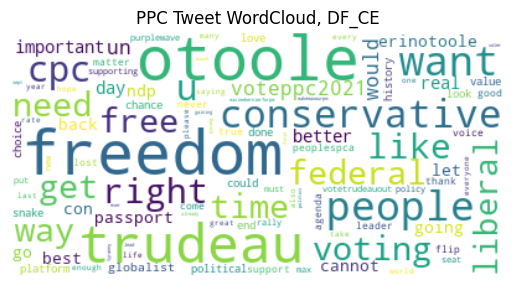

In [29]:
#BONUS, produce a visual wordcloud for the liberal tweets in the df, what are the most popular ppc words?

text = (" ").join(tweet for tweet in ppc_df.text)

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(stopwords=ppc_words+sw,max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.title('PPC Tweet WordCloud, DF_CE')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


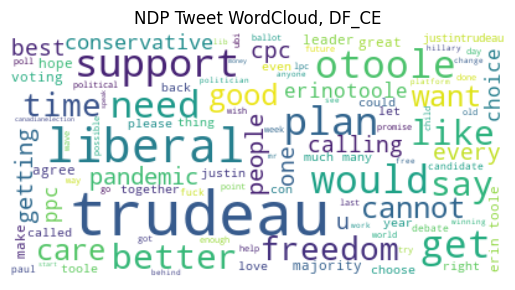

In [30]:
#BONUS, produce a visual wordcloud for the liberal tweets in the df, what are the most popular ndp words?

text = (" ").join(tweet for tweet in ndp_df.text)

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(stopwords=ndp_words+sw,max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.title('NDP Tweet WordCloud, DF_CE')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [31]:
#BONUS, Analysis of the wordclouds 

print("We see that one of the most popular words in both liberal and conservative tweets is the name of the opposition's leader, indicating that a good portion of these tweets were made attacking each other's parties. A lot of the words in conservative tweets are actually words negative to conservatives, such as voteliberal, indicating the conservatives tweets may not be all about their party. The PPC tweets have words that focus on people and freedom, which aligns with the party's messages. NDP tweets seem to have a lot of positive words, such as support and plan. But they also have a heavy focus on the liberals, mentioning trudeau as their most popular word.")


We see that one of the most popular words in both liberal and conservative tweets is the name of the opposition's leader, indicating that a good portion of these tweets were made attacking each other's parties. A lot of the words in conservative tweets are actually words negative to conservatives, such as voteliberal, indicating the conservatives tweets may not be all about their party. The PPC tweets have words that focus on people and freedom, which aligns with the party's messages. NDP tweets seem to have a lot of positive words, such as support and plan. But they also have a heavy focus on the liberals, mentioning trudeau as their most popular word.


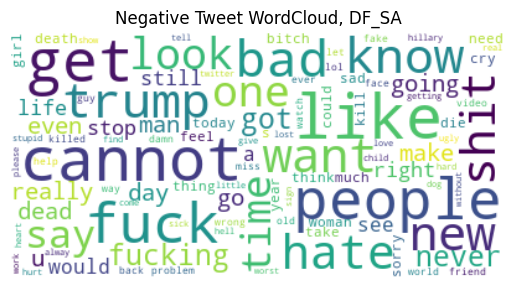

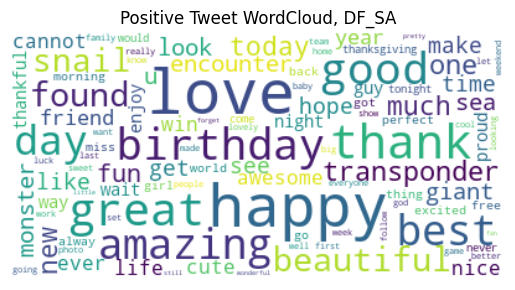

In [32]:
#Produce a Visual for DF_SA
#BONUS, two visuals, one for each sentiment

text = (" ").join(tweet for tweet in (neg_df.text.astype('U')))

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(stopwords=['rt','http'],max_font_size=50, max_words=100, background_color="white",collocations=False).generate(text)
plt.figure()
plt.title('Negative Tweet WordCloud, DF_SA')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

text = (" ").join(tweet for tweet in (pos_df.text.astype('U')))

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(stopwords=['rt','http'],max_font_size=50, max_words=100, background_color="white",collocations=False).generate(text)
plt.figure()
plt.title('Positive Tweet WordCloud, DF_SA')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



In [33]:
#BONUS, Analysis of wordclouds
print("The most common negative words show some derogatory comments and hateful words as we would expect, no surprises here. They also include the name of polarizing figures such as trump. Interestingly, people is one of the most common words in negative tweets, showing us that a lot of negative tweets were made directing these derogatory comments towards people (i.e complaints or hate speech). The most common positive tweets contained some happy words such as 'thank' and 'love'. Interesting to note that birthday was frequently present in positive tweets. This tells us that likely many of the positive tweets were actually birthday wishes to other twitter users. We expect our models will learn these common words reward and penalize accordingly to label a tweet as positive or negative")

The most common negative words show some derogatory comments and hateful words as we would expect, no surprises here. They also include the name of polarizing figures such as trump. Interestingly, people is one of the most common words in negative tweets, showing us that a lot of negative tweets were made directing these derogatory comments towards people (i.e complaints or hate speech). The most common positive tweets contained some happy words such as 'thank' and 'love'. Interesting to note that birthday was frequently present in positive tweets. This tells us that likely many of the positive tweets were actually birthday wishes to other twitter users. We expect our models will learn these common words reward and penalize accordingly to label a tweet as positive or negative


In [34]:
#Change positive and negative sentiment to 1s and 0s in df_ce for later use in regression

df_ce['Sentiment_Num'] = np.zeros(len(df_ce))
df_ce['Sentiment_Num'][df_ce['sentiment'] == 'positive'] = 1


C:\Users\alvipane\AppData\Local\Temp\ipykernel_27416\2667898806.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ce['Sentiment_Num'][df_ce['sentiment'] == 'positive'] = 1


In [35]:
#let's see the breakdown of positive and negative tweets in df_ce
df_ce.groupby("Sentiment_Num").count()

,Unnamed: 0,text,sentiment,negative_reason,Liberal,Conservative,NDP,PPC
Sentiment_Num,,,,,,,,
0.0,387,387,387,387,387,387,387,387
1.0,615,615,615,0,615,615,615,615


In [36]:
#let's see the breakdown of positive and negative tweets in df_sa
df_sa.groupby("label").count()

,Unnamed: 0,text
label,,
0,179050,178362
1,371341,370295


In [37]:
print("Percent Positive, DF_CE")
print((615/(615+387))*100)

print("We can see that 61% of the tweets in DF CE are positive, so a model that predicts every tweet to be positive will be right 61% of the time. The goal will be to train models that do better than this base heuristic.")
print(" ")
#Repeat for df sa
print("Percent Positive, DF_SA")
print((371341/(371341+179050))*100)

print("We can see that 67.5% of the tweets in DF CE are positive, so a model that predicts every tweet to be positive will be right 67.5% of the time. The goal will be to train models that do better than this.")

Percent Positive, DF_CE
61.377245508982035
We can see that 61% of the tweets in DF CE are positive, so a model that predicts every tweet to be positive will be right 61% of the time. The goal will be to train models that do better than this base heuristic.
 
Percent Positive, DF_SA
67.4685814266585
We can see that 67.5% of the tweets in DF CE are positive, so a model that predicts every tweet to be positive will be right 67.5% of the time. The goal will be to train models that do better than this.


# **3. Model preparation (13 marks)**  
Split the generic tweets randomly into training data (65%) and test data (35%).  
Prepare the data to try seven classification algorithms – logistic regression, k-NN, Naive Bayes, SVM, decision trees, Random Forest and XGBoost, where each tweet is considered a single observation/example. In these models, the target variable is the sentiment value, which is either positive or negative. Try two different types of features, Bag of Words (word frequency) and TF-IDF on all 7 models. (Hint: Be careful about when to split the dataset into training and testing set.)

In [38]:
# import package related to Model Preparation
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [39]:

#get text corpus and labels for use
text_corpus = df_sa["text"]
text_labels = df_sa["label"]

#seperate hold out data first to avoid leakage

X_train, X_test, y_train, y_test = train_test_split(text_corpus, text_labels, test_size=0.35, random_state=40)
xtrain_df,xtest_df =train_test_split(df_ce, test_size=0.35, random_state=40)


print("Training set size: %d" % len(X_train))
print("Test set size: %d" % len(X_test))

Training set size: 357754
Test set size: 192637


In [81]:
from sklearn.feature_extraction.text import CountVectorizer

#Create Bag of Words using count vectorizer - DF_SA, on the train and test set separately
count_vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\w+')
bow = dict()
bow["train"] = (count_vectorizer.fit_transform(X_train.values.astype('U')), y_train)
bow["test"]  = (count_vectorizer.transform(X_test.values.astype('U')), y_test)




In [80]:
#Create tf-idf using tfidf vectorizer - DF_SA, on train and test set separately

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w+')

tfidf = dict()
tfidf["train"] = (tfidf_vectorizer.fit_transform(X_train.values.astype('U')), y_train)
tfidf["test"]  = (tfidf_vectorizer.transform(X_test.values.astype('U')), y_test)

#debug
print(tfidf["train"][0].shape)
print(tfidf["test"][0].shape)

(357754, 247870)
(192637, 247870)


# **4. Model implementation and tuning (60 marks)**

**4.1)** Using both types of features (Bag of Words and TF-IDF), train models on the training data from generic tweets and apply the model to the test data to obtain an accuracy value.

**a.** Evaluate the trained model with the best performance on the Canadian Elections data. How well do your predictions match the sentiment labelled in the Canadian elections data?

In [42]:
import time
import itertools
#!pip install xgboost
# import modelization related packages
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB 
from sklearn.svm import LinearSVC    
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

from sklearn.model_selection import GridSearchCV

In [43]:
#Define Helper Function for Printing Results


def results(y_test, y_predict):  

    #get accuracy = (tp + tn)/ total
    accuracy = accuracy_score(y_test, y_predict)

    #get precision = tp / (tp+fp)
    precision = precision_score(y_test, y_predict, pos_label=None,
                                    average='weighted')             
    #get recall = tp / (tp + fn)
    recall = recall_score(y_test, y_predict, pos_label=None,
                              average='weighted')
    
    #get f1 score
    f1 = f1_score(y_test, y_predict, pos_label=None, average='weighted')
    
    return accuracy, precision, recall, f1

In [88]:
# your code start from here.

#Define the different models: logistic regression, k-NN, Naive Bayes, SVM, decision trees, Random Forest and XGBoost,

#Note we will use default setting for comparision, based on trials the accuracy was sufficent to warrant no further tuning

#LR
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', random_state=40)

#SVM
from sklearn.svm import LinearSVC

svm_classifier = LinearSVC(C=1.0, class_weight='balanced', multi_class='ovr', random_state=40)

#NB
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier_gauss = GaussianNB(priors=None, var_smoothing=1e-09)

#k-NN
knn5_classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

knn10_classifier = KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

#Decision Trees

dt_classifier = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

#Random Forest
#5 estimators to limit training time (can be hours long)
rf_classifier = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=True, n_jobs=-1, random_state=40, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

#XGBoost

xgb_classifier = XGBClassifier(learning_rate=0.02,n_estimators=100,objective="binary:logistic",nthread=3)
    

In [97]:
print('''****IMPORTANT*******
Note the following convention for the confusion matrices in the next section:
-Column 0 represents predicted negative tweets (neg)
-Column 1 represets predictive positive tweets (pos)

Example:

              predicted label
              neg  |  pos       
              ------------
true     neg    TN |  FP
label         ------------
         pos    FN |  TP


Definitions:
         TN = True Negative (predicted negative, true label negative)
         FN = False Negative (predicted negative, true label positive)
         FP = False Positive (predicted positive, true label negative)
         TP = True Positive (predicted positive, true label positive)
''')

****IMPORTANT*******
Note the following convention for the confusion matrices in the next section:
-Column 0 represents predicted negative tweets (neg)
-Column 1 represets predictive positive tweets (pos)

Example:

              predicted label
              neg  |  pos       
              ------------
true     neg    TN |  FP
label         ------------
         pos    FN |  TP


Definitions:
         TN = True Negative (predicted negative, true label negative)
         FN = False Negative (predicted negative, true label positive)
         FP = False Positive (predicted positive, true label negative)
         TP = True Positive (predicted positive, true label positive)



In [45]:
#Evaluate LR with bow
feature = bow
classifier = lr_classifier
classifier.fit(*feature["train"])

y_predict = classifier.predict(feature["test"][0])

accuracy, precision, recall,f1= results(feature["test"][1], y_predict)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

cm = confusion_matrix(feature["test"][1], y_predict)
print(cm)


accuracy = 0.963, precision = 0.964, recall = 0.963, f1 = 0.964
[[ 60469   2338]
 [  4723 125107]]


In [46]:
#Evaluate LR with TF-IDF
feature = tfidf
classifier = lr_classifier
classifier.fit(*feature["train"])

y_predict = classifier.predict(feature["test"][0])

accuracy, precision, recall,f1= results(feature["test"][1], y_predict)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

cm = confusion_matrix(feature["test"][1], y_predict)
print(cm)

accuracy = 0.966, precision = 0.966, recall = 0.966, f1 = 0.966
[[ 60604   2203]
 [  4408 125422]]


In [47]:
#Evaluate SVM with BOW
feature = bow
classifier = svm_classifier
classifier.fit(*feature["train"])

y_predict = classifier.predict(feature["test"][0])

accuracy, precision, recall,f1= results(feature["test"][1], y_predict)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

cm = confusion_matrix(feature["test"][1], y_predict)
print(cm)

accuracy = 0.966, precision = 0.967, recall = 0.966, f1 = 0.966
[[ 60712   2095]
 [  4470 125360]]


In [48]:
#Evaluate SVM with TF-IDF
feature = tfidf
classifier = svm_classifier
classifier.fit(*feature["train"])

y_predict = classifier.predict(feature["test"][0])

accuracy, precision, recall,f1= results(feature["test"][1], y_predict)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

cm = confusion_matrix(feature["test"][1], y_predict)
print(cm)

accuracy = 0.968, precision = 0.968, recall = 0.968, f1 = 0.968
[[ 60827   1980]
 [  4212 125618]]


In [49]:
#Evaluate NB with BOW
feature = bow
classifier = nb_classifier
classifier.fit(*feature["train"])

y_predict = classifier.predict(feature["test"][0])

accuracy, precision, recall,f1= results(feature["test"][1], y_predict)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

cm = confusion_matrix(feature["test"][1], y_predict)
print(cm)

accuracy = 0.944, precision = 0.944, recall = 0.944, f1 = 0.944
[[ 55821   6986]
 [  3719 126111]]


In [50]:
#Evaluate NB with tfidf
feature = tfidf
classifier = nb_classifier
classifier.fit(*feature["train"])

y_predict = classifier.predict(feature["test"][0])

accuracy, precision, recall,f1= results(feature["test"][1], y_predict)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

cm = confusion_matrix(feature["test"][1], y_predict)
print(cm)

accuracy = 0.908, precision = 0.914, recall = 0.908, f1 = 0.905
[[ 46940  15867]
 [  1809 128021]]


In [ ]:
#Note that the K-NN classifiers are slow and the following sections take >20mins to run

In [51]:
#Evaluate Knn-5 with BOW

feature = bow
classifier = knn5_classifier
classifier.fit(*feature["train"])

y_predict = classifier.predict(feature["test"][0])

accuracy, precision, recall,f1= results(feature["test"][1], y_predict)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

cm = confusion_matrix(feature["test"][1], y_predict)
print(cm)

accuracy = 0.900, precision = 0.903, recall = 0.900, f1 = 0.901
[[ 55550   7257]
 [ 12078 117752]]


In [52]:
#Evaluate Knn-5 with tfidf

feature = tfidf
classifier = knn5_classifier
classifier.fit(*feature["train"])

y_predict = classifier.predict(feature["test"][0])

accuracy, precision, recall,f1= results(feature["test"][1], y_predict)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

cm = confusion_matrix(feature["test"][1], y_predict)
print(cm)

accuracy = 0.671, precision = 0.740, recall = 0.671, f1 = 0.681
[[49541 13266]
 [50057 79773]]


In [54]:
#Evaluate Knn-10 with BOW

feature = bow
classifier = knn10_classifier
classifier.fit(*feature["train"])

y_predict = classifier.predict(feature["test"][0])

accuracy, precision, recall,f1= results(feature["test"][1], y_predict)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

cm = confusion_matrix(feature["test"][1], y_predict)
print(cm)

accuracy = 0.899, precision = 0.904, recall = 0.899, f1 = 0.900
[[ 56615   6192]
 [ 13344 116486]]


In [55]:
#Evaluate Knn-10 with tfidf

feature = tfidf
classifier = knn10_classifier
classifier.fit(*feature["train"])

y_predict = classifier.predict(feature["test"][0])

accuracy, precision, recall,f1= results(feature["test"][1], y_predict)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

cm = confusion_matrix(feature["test"][1], y_predict)
print(cm)

accuracy = 0.603, precision = 0.762, recall = 0.603, f1 = 0.604
[[57253  5554]
 [70916 58914]]


In [56]:
#Evaluate DT with BOW

feature = bow
classifier = dt_classifier
classifier.fit(*feature["train"])

y_predict = classifier.predict(feature["test"][0])

accuracy, precision, recall,f1= results(feature["test"][1], y_predict)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

cm = confusion_matrix(feature["test"][1], y_predict)
print(cm)


accuracy = 0.943, precision = 0.943, recall = 0.943, f1 = 0.943
[[ 56872   5935]
 [  5030 124800]]


In [57]:
#Evaluate DT with tfidf

feature = tfidf
classifier = dt_classifier
classifier.fit(*feature["train"])

y_predict = classifier.predict(feature["test"][0])

accuracy, precision, recall,f1= results(feature["test"][1], y_predict)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

cm = confusion_matrix(feature["test"][1], y_predict)
print(cm)

accuracy = 0.944, precision = 0.944, recall = 0.944, f1 = 0.944
[[ 57437   5370]
 [  5484 124346]]


In [89]:
#Evaluate RF with BOW


feature = bow
classifier = rf_classifier
classifier.fit(*feature["train"])

y_predict = classifier.predict(feature["test"][0])

accuracy, precision, recall,f1= results(feature["test"][1], y_predict)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

cm = confusion_matrix(feature["test"][1], y_predict)
print(cm)

accuracy = 0.674, precision = 0.454, recall = 0.674, f1 = 0.543
[[     0  62807]
 [     0 129830]]


c:\Users\alvipane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
#Evaluate RF with tfidf

feature = tfidf
classifier = rf_classifier
classifier.fit(*feature["train"])

y_predict = classifier.predict(feature["test"][0])

accuracy, precision, recall,f1= results(feature["test"][1], y_predict)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

cm = confusion_matrix(feature["test"][1], y_predict)
print(cm)
print('\nAnalysis\ninterestingly enough, for both tfidf and bow, the random forest classifer has reproduced the base heuristic, classifying every tweet as positive.')

c:\Users\alvipane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy = 0.674, precision = 0.454, recall = 0.674, f1 = 0.543
[[     0  62807]
 [     0 129830]]

Analysis
interestingly enough, for both tfidf and bow, the random forest classifer has reproduced the base heuristic, classifying every tweet as positive.


In [92]:
#Evaluate XGB with BOW

feature = bow
classifier = xgb_classifier
classifier.fit(*feature["train"])

y_predict = classifier.predict(feature["test"][0])

accuracy, precision, recall,f1= results(feature["test"][1], y_predict)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

cm = confusion_matrix(feature["test"][1], y_predict)
print(cm)

accuracy = 0.810, precision = 0.842, recall = 0.810, f1 = 0.816
[[ 55612   7195]
 [ 29322 100508]]


In [93]:
#Evaluate XGB with tfidf

feature = tfidf
classifier = xgb_classifier
classifier.fit(*feature["train"])

y_predict = classifier.predict(feature["test"][0])

accuracy, precision, recall,f1= results(feature["test"][1], y_predict)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

cm = confusion_matrix(feature["test"][1], y_predict)
print(cm)

accuracy = 0.811, precision = 0.843, recall = 0.811, f1 = 0.816
[[ 55634   7173]
 [ 29331 100499]]


In [99]:
#Analysis

print("The best model was SVM with TF-IDF features, which had an accuracy of 96.8%, an improvement over the base heuristic of 67% on the test set (df_sa), and an F1-score of 0.968. Let's test it on the Canadian Elections dataset next to see how it performs. ")

The best model was SVM with TF-IDF features, which had an accuracy of 96.8%, an improvement over the base heuristic of 67% on the training set (df_sa), and an F1-score of 0.968. Let's test it on the Canadian Elections dataset next to see how it performs. 


In [103]:
#Evaluate the best model on Canadian Elections Data

#Prepare the new test set from df_ce

text_corpusce = df_ce["text"]
text_labelsce = np.array(df_ce["Sentiment_Num"])

testce  = (tfidf_vectorizer.transform(text_corpusce.values.astype('U')))

#Re-obtain predictions from best model
#Evaluate SVM with TF-IDF
feature = tfidf
classifier = svm_classifier
classifier.fit(*feature["train"])

y_predict = classifier.predict(testce)

accuracy, precision, recall,f1= results(text_labelsce, y_predict)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

cm = confusion_matrix(text_labelsce, y_predict)
print(cm)

#Analysis

print("The change in test dataset has resulted in a huge drop off in performance from the sentiment_analysis DF to the Canadian elections DF. From 96.8%, our accuracy has fallen to 65.1%. The f1-score also falls from 0.968 to 0.643. From the confusion matrix, we can see that we have way too many false negatives, 324 of them. Of 350 incorrect predictions, 324 were false negatives (26 false positives). This is the weak point of our model. The accuracy is not very good because, as we previously noted, the base heuristic of selecting positive every time would yield an accuracy of 61% on DF_CE, so this is not much of an improvement. It seems that our model has been skewed to categorize a lot of positive tweets as negative. Let's investigate further in the next sectionas to see why this may have been the case.")

accuracy = 0.651, precision = 0.767, recall = 0.651, f1 = 0.643
[[361  26]
 [324 291]]
The change in test dataset has resulted in a huge drop off in performance from the sentiment_analysis DF to the Canadian elections DF. From 96.8%, our accuracy has fallen to 65.1%. The f1-score also falls from 0.968 to 0.643. From the confusion matrix, we can see that we have way too many false negatives, 324 of them. Of 350 incorrect predictions, 324 were false negatives (26 false positives). This is the weak point of our model. The accuracy is not very good because, as we previously noted, the base heuristic of selecting positive every time would yield an accuracy of 61% on DF_CE, so this is not much of an improvement. It seems that our model has been skewed to categorize a lot of positive tweets as negative. Let's investigate further in the next sectionas to see why this may have been the case.


**b.** Propose two other metrics you could use to evaluate the models. In one to two sentences, provide reasoning for each metric

In [106]:
# your code start from here.

print("We could use precision and recall as well to evaluate our models\n")

print('''Precision tells us the ratio of true positives to the total predicted positives. This helps us to be very sure of our predictions. A model that is more inclined to return a positive result might have an inflated accuracy if the majority of the tweets have a positive sentiment. This metric helps us evaluate our models on how precise the positive predictions are. This could be useful if we want to be very sure about not labelling negative tweets as positive.\n''')

print('''Recall tells us the ratio that the model is accurately classifying true positives. It is the number of correct positive results divided by the number of samples that should have been positive (tp + fn). This can be thought of as the model's ability to find all the relevant positive tweets in the dataset. This is particularly useful if we want to be careful about false negatives. If we deem the cost of overlooked cases (false negatives) to be high, we will want to ensure a high recall for our model relative to others. ''')

We could use precision and recall as well to evaluate our models

Precision tells us the ratio of true positives to the total predicted positives. This helps us to be very sure of our predictions. A model that is more inclined to return a positive result might have an inflated accuracy if the majority of the tweets have a positive sentiment. This metric helps us evaluate our models on how precise the positive predictions are. This could be useful if we want to be very sure about not labelling negative tweets as positive.

Recall tells us the ratio that the model is accurately classifying true positives. It is the number of correct positive results divided by the number of samples that should have been positive (tp + fn). This can be thought of as the model's ability to find all the relevant positive tweets in the dataset. This is particularly useful if we want to be careful about false negatives. If we deem the cost of overlooked cases (false negatives) to be high, we will want to ensu

**c.** Choose the model that has the best performance and visualize the sentiment prediction results and the true sentiment for each of the 4 parties. From this model, discuss your findings and whether NLP analytics based on tweets is useful for political parties during election campaigns. Explain how each party is viewed in the public eye based on the sentiment value. Suggest one way you can improve the accuracy of this model.

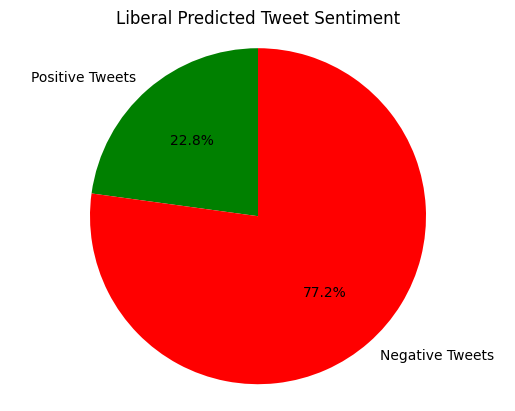

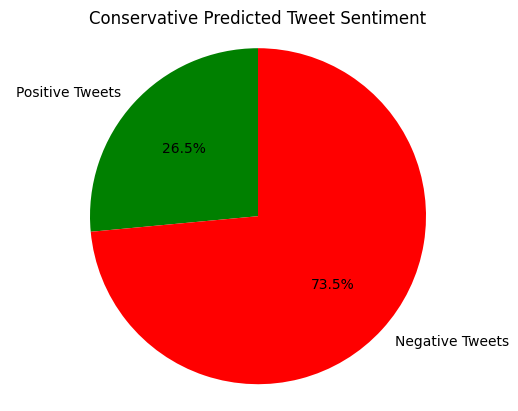

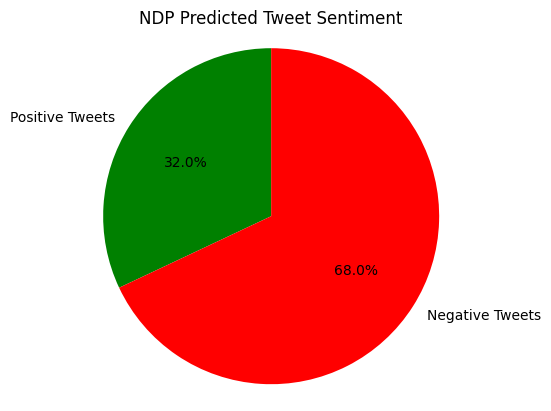

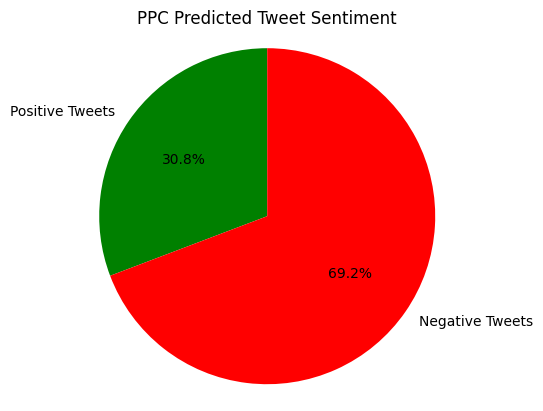

In [107]:
#Produce Predicted Sentiments, and display in pie charts for each party

xtest_df=df_ce

#add predictions column to dataset
xtest_df['predictions'] = y_predict

#separate predictions by party
lib_pdf = xtest_df[xtest_df['Liberal'] == 1]

cons_pdf = xtest_df[xtest_df['Conservative'] == 1]

ndp_pdf = xtest_df[xtest_df['NDP'] == 1]

ppc_pdf = xtest_df[xtest_df['PPC'] == 1]

#check party distributions and produce a pi chart for each
lib_pdf.groupby("predictions").count() #91 / (74+91) are positive

plt.pie([len(lib_pdf[lib_pdf["predictions"]==1.0]),len(lib_pdf[lib_pdf["predictions"]==0]) ],labels=['Positive Tweets','Negative Tweets'], colors=['green','red'], startangle=90, autopct='%1.1f%%')
plt.title('Liberal Predicted Tweet Sentiment')
plt.axis('equal')

plt.show()

cons_pdf.groupby("predictions").count() #77 / (77+37) are positive

plt.pie([len(cons_pdf[cons_pdf["predictions"]==1.0]),len(cons_pdf[cons_pdf["predictions"]==0]) ],labels=['Positive Tweets','Negative Tweets'], colors=['green','red'], startangle=90, autopct='%1.1f%%')
plt.title('Conservative Predicted Tweet Sentiment')
plt.axis('equal')

plt.show()

ndp_pdf.groupby("predictions").count() #18 / (18+7) are positive

plt.pie([len(ndp_pdf[ndp_pdf["predictions"]==1.0]),len(ndp_pdf[ndp_pdf["predictions"]==0]) ],labels=['Positive Tweets','Negative Tweets'], colors=['green','red'], startangle=90, autopct='%1.1f%%')
plt.title('NDP Predicted Tweet Sentiment')
plt.axis('equal')

plt.show()

ppc_pdf.groupby("predictions").count() #39 / (39+2) are positive


plt.pie([len(ppc_pdf[ppc_pdf["predictions"]==1.0]),len(ppc_pdf[ppc_pdf["predictions"]==0]) ],labels=['Positive Tweets','Negative Tweets'], colors=['green','red'], startangle=90, autopct='%1.1f%%')
plt.title('PPC Predicted Tweet Sentiment')
plt.axis('equal')

plt.show()




In [109]:
print('''Analysis:
At first glance, this seems to confirm our earlier guess that the model is biasing the predictions towards the negative label''')

Analysis:
At first glance, this seems to confirm our earlier guess that the model is biasing the predictions towards the negative label


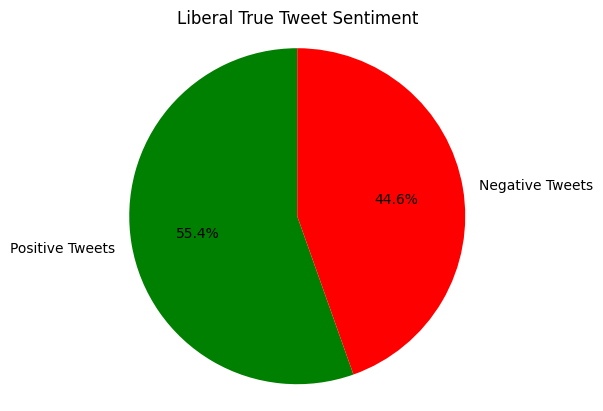

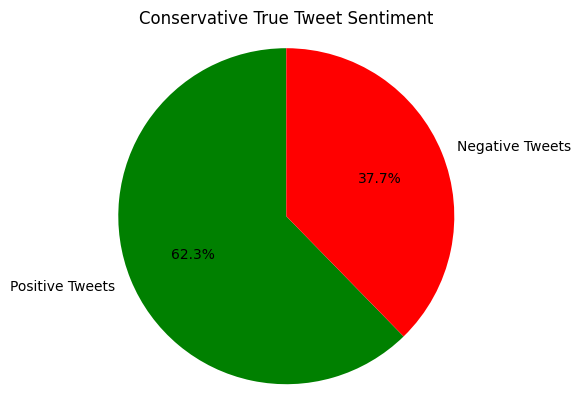

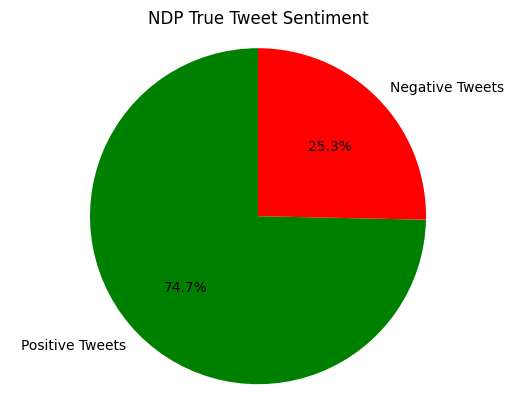

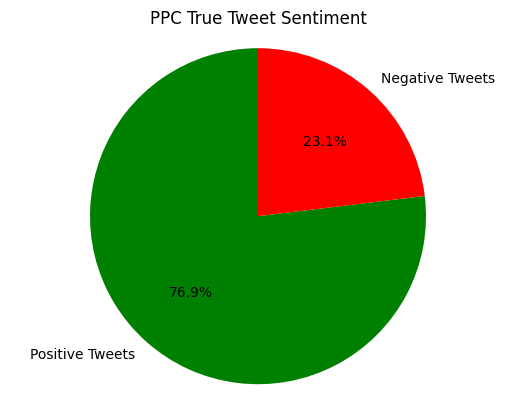

In [110]:
#same analysis but for true sentiment

#Produce True Sentiments, and display in pie charts for each party

#separate by party
lib_df = df_ce[df_ce['Liberal'] == 1]

cons_df = df_ce[df_ce['Conservative'] == 1]

ndp_df = df_ce[df_ce['NDP'] == 1]

ppc_df = df_ce[df_ce['PPC'] == 1]

#check liberal distribution
lib_df.groupby("Sentiment_Num").count() #250 / (201+250) are positive

plt.pie([len(lib_df[lib_df["Sentiment_Num"]==1.0]),len(lib_df[lib_df["Sentiment_Num"]==0.0]) ],labels=['Positive Tweets','Negative Tweets'], colors=['green','red'], startangle=90, autopct='%1.1f%%')
plt.title('Liberal True Tweet Sentiment')
plt.axis('equal')

plt.show()

cons_df.groupby("Sentiment_Num").count() #200 / (121+200) are positive

plt.pie([len(cons_df[cons_df["Sentiment_Num"]==1.0]),len(cons_df[cons_df["Sentiment_Num"]==0.0]) ],labels=['Positive Tweets','Negative Tweets'], colors=['green','red'], startangle=90, autopct='%1.1f%%')
plt.title('Conservative True Tweet Sentiment')
plt.axis('equal')

plt.show()

ndp_df.groupby("Sentiment_Num").count() #56 / (19+56) are positive

plt.pie([len(ndp_df[ndp_df["Sentiment_Num"]==1.0]),len(ndp_df[ndp_df["Sentiment_Num"]==0.0]) ],labels=['Positive Tweets','Negative Tweets'], colors=['green','red'], startangle=90, autopct='%1.1f%%')
plt.title('NDP True Tweet Sentiment')
plt.axis('equal')

plt.show()

ppc_df.groupby("Sentiment_Num").count() #80 / (80+24) are positive

plt.pie([len(ppc_df[ppc_df["Sentiment_Num"]==1.0]),len(ppc_df[ppc_df["Sentiment_Num"]==0.0]) ],labels=['Positive Tweets','Negative Tweets'], colors=['green','red'], startangle=90, autopct='%1.1f%%')
plt.title('PPC True Tweet Sentiment')
plt.axis('equal')

plt.show()


In [113]:
#Analysis
print("Analysis of the above\n")

print('''Our model has severely overpredicted the amount of negative tweets across all parties. The ndp had the greatest amount of predicted positive tweets, followed closely by the ppc. The conservative party was next, and then the liberal party had the most negative tweets. We should note that this order does nearly match the true sentiments, with ppc/ndp being most positive, followed by conservatives and lastly liberals. It's clear that our model holds a heavy negative bias, that has shifted the sentiment towards the negative end, but roughly equally across the 4 parties. This bias may come from the model being trained on a dataset that had text entries which were labelled out of the political context. Applying the model to a political set of tweets led a lot of positive tweets to be skewed negative. This is an example of Representation Bias, where our training dataset did not do a good job of representing the sentiment in political tweets. We can improve the accuracy of the model by training our model on a set of labelled Canadian political tweets, which better represent our test set. 

The sentiments collected from the Canadian Elections dataset would tend to suggest that people feel most negatively about the liberal party, although in hindsight they won the election. We must thus be careful when using NLP based on tweets to analyze public sentiment. There is representation bias built into this model. Twitter users do not generally represent the whole Canadian population, so we need to be careful making claims about how a party is viewed based on this. I still think NLP is useful for parties to get a general idea of how people online feel, which they can use to coordinate twitter campaigning. They can also use it to track how their followers are reacting in real-time to any news/policy decisions. Since people tweet in real time, twitter NLP allows for rapid polling of the geopolitical landscape, whereas traditional polling may take a long time. This allows parties or companies to be very quick to react to public sentiment, and better inform their business decisions.''')



Analysis of the above

Our model has severely overpredicted the amount of negative tweets across all parties. The ndp had the greatest amount of predicted positive tweets, followed closely by the ppc. The conservative party was next, and then the liberal party had the most negative tweets. We should note that this order does nearly match the true sentiments, with ppc/ndp being most positive, followed by conservatives and lastly liberals. It's clear that our model holds a heavy negative bias, that has shifted the sentiment towards the negative end, but roughly equally across the 4 parties. This bias may come from the model being trained on a dataset that had text entries which were labelled out of the political context. Applying the model to a political set of tweets led a lot of positive tweets to be skewed negative. This is an example of Representation Bias, where our training dataset did not do a good job of representing the sentiment in political tweets. We can improve the accuracy 

**4.2)** Split the negative Canadian elections tweets into training data (65%) and test data (35%). Use the true sentiment labels in the Canadian elections data instead of your predictions from the previous part. Choose one algorithms from classification algorithms (choose any model from logistic regression, k-NN, Naive Bayes, SVM, decision trees, RF, XGBoost), train multi-class classification model to predict the reason for the negative tweets. Tune the hyperparameters and chose the model with best score to test your prediction reason for negative sentiment tweets.

In [114]:
# your code start from here.
print("Let's see the types of negative reasons\n")
print(df_ce["negative_reason"].value_counts())

#create dictionary of reasons with numerical mapping
reasons = {'others':0,'calling election early':1,'tell lies':2,'covid ':3,'economy':4,'gun control':5,'climate problem':6,'scandal':7,'healthcare and marijuana':8,'women reproductive right and racism':9,'segregation':10}

neg_df = df_ce[df_ce["Sentiment_Num"]==0]
#map reasons
neg_df['neg_rsn']= neg_df['negative_reason'].map(reasons)


Let's see the types of negative reasons

others                                 149
calling election early                  73
tell lies                               61
covid                                   25
economy                                 20
gun control                             16
climate problem                         15
scandal                                 14
healthcare and marijuana                 7
women reproductive right and racism      4
segregation                              3
Name: negative_reason, dtype: int64


C:\Users\alvipane\AppData\Local\Temp\ipykernel_27416\406993488.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_df['neg_rsn']= neg_df['negative_reason'].map(reasons)


In [116]:
#Train and test base model for our chosen model, the knn classifier. Knn chosen as it's known to work well with higher numbers of classes

#go through train and test process as before
text_corpus = neg_df["text"].astype('U')
text_labels = neg_df["neg_rsn"].astype('U')

X_train, X_test, y_train, y_test = train_test_split(text_corpus, text_labels, test_size=0.35, random_state=40)
xtrain_df,xtest_df =train_test_split(df_ce, test_size=0.35, random_state=40)

tfidf_vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w+')

tfidf = dict()
tfidf["train"] = (tfidf_vectorizer.fit_transform(X_train), y_train)
tfidf["test"]  = (tfidf_vectorizer.transform(X_test), y_test)

feature = tfidf
classifier = knn5_classifier
classifier.fit(*feature["train"])

y_predict = classifier.predict(feature["test"][0])

accuracy, precision, recall,f1= results(feature["test"][1], y_predict)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

cm = confusion_matrix(feature["test"][1], y_predict)
print(cm)

print("\nOur accuracy is very poor, let's see if we can improve it with hyperparameter tuning.")


accuracy = 0.419, precision = 0.349, recall = 0.419, f1 = 0.379
[[33  9  0 10  1  0  0  0  0  0]
 [ 6 14  0  2  2  2  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0]
 [11  1  0  5  0  1  1  0  0  0]
 [ 5  2  0  1  0  0  1  0  0  0]
 [ 1  2  0  1  1  4  0  0  0  0]
 [ 3  0  0  0  0  0  1  0  0  0]
 [ 7  0  0  1  0  1  0  0  0  0]
 [ 1  2  0  0  0  0  0  0  0  0]
 [ 2  0  0  1  0  0  0  0  0  0]]

Our accuracy is very poor, let's see if we can improve it with hyperparameter tuning.


c:\Users\alvipane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [173]:
#Use Grid Search CV to Tune Parameters of our Model

#knn5_classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, 
# metric='minkowski', metric_params=None, n_jobs=None)


# defining parameter ranges
param_grid = {'n_neighbors':[1,5,10,15,20,25], 
        'weights':['uniform','distance'],
         'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 
         'leaf_size':[10,20,30,40,50], 
         'p':[1,2,3,4,5], 
        'metric':['minkowski'],
              }  
   
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(tfidf["train"][0], tfidf["train"][1]) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(tfidf["test"][0]) 

#get new results

accuracy, precision, recall,f1= results(feature["test"][1], grid_predictions)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

cm = confusion_matrix(feature["test"][1], y_predict)
print(cm)
   


Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


c:\Users\alvipane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


{'algorithm': 'auto', 'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 15, 'p': 2, 'weights': 'distance'}
accuracy = 0.507, precision = 0.399, recall = 0.507, f1 = 0.435
[[33  9  0 10  1  0  0  0  0  0]
 [ 6 14  0  2  2  2  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0]
 [11  1  0  5  0  1  1  0  0  0]
 [ 5  2  0  1  0  0  1  0  0  0]
 [ 1  2  0  1  1  4  0  0  0  0]
 [ 3  0  0  0  0  0  1  0  0  0]
 [ 7  0  0  1  0  1  0  0  0  0]
 [ 1  2  0  0  0  0  0  0  0  0]
 [ 2  0  0  1  0  0  0  0  0  0]]


c:\Users\alvipane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3600 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3600 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alvipane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alvipane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 207, in fit
    return self._fit(X, y)
  File "c:\Users\alvipane\AppData\Local\Programs\Python\Python310\lib\s

In [118]:
print("\nHyperparameter tuning was successful in improving our accuracy by about 9%, from 41.9% to 50.7%")



Hyperparameter tuning was successful in improving our accuracy by about 9%, from 41.9% to 50.7%


**a. Provide a few reasons why your model may fail to predict the correct negative reasons. Back up your reasoning with examples from the test sets.**  


In [119]:
# your explanation start from here.

#Let's look back at the dataset for clues, replicate train test split
X_tr, X_te, y_tr, y_te = train_test_split(neg_df,neg_df["neg_rsn"], test_size=0.35, random_state=40)

print("Breakdown of negative reasons in the Training Set")
print(X_tr.groupby("negative_reason").count()['text'])
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("Breakdown of negative reasons in the Test Set")
print(X_te.groupby("negative_reason").count()['text'])

Breakdown of negative reasons in the Training Set
negative_reason
calling election early                 47
climate problem                         6
covid                                  16
economy                                11
gun control                            12
healthcare and marijuana                4
others                                 96
scandal                                11
segregation                             2
tell lies                              42
women reproductive right and racism     4
Name: text, dtype: int64
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Breakdown of negative reasons in the Test Set
negative_reason
calling election early      26
climate problem              9
covid                        9
economy                      9
gun control                  4
healthcare and marijuana     3
others                      53
scandal                      3
segregation                  1
tell lies                   19
Name: text, dtype: int64


In [122]:
print("Analysis\n")
print('''Looking at the breakdown of each group on both the training and test set it is immediately obvious that our sample size in training this model was much too small given the large number of classes. In total, the model is trained on 251 data points, but 8 out of the 11 groups contain less than 20 data points each. The 'other' category is by far the largest in the dataset with 96 entries, and segregation is the smallest, with only 2 points. Working with small datasets for each group introduces several problems that may have resulted in such poor performance of our model. The first is the problem of overfitting. Since we train each class on only a few datapoints we might be creating a model that fits the training set very well, but fails to generalize to the test set. We can note that the test set is also small, which makes it even more difficult for the model to correctly classify the few specific points in each class. Another potential issue with smaller datasets is outliers. If there are any mislabelled data points in the training set, the small size of the training set will amplify the effect of these, and lead our model to be less accurate as the training for each class is skewed. We may also be introducing a sampling bias by using few datapoints for each class, which may consequently not appropriately represent reality. Lastly, we have the issue of a class missing from the test set. We can notice that 'women reproductive rights and racism' has 4 entries in the training set, and 0 in the test set. The model is being trained on this class, and may predict this class when in reality it is not at all represented in the test set. Having to deal with many different classes is a tricky problem, and all of the above factors describe some potential issues that cause our model to incorrectly predict the negative reasons.''')


Analysis

Looking at the breakdown of each group on both the training and test set it is immediately obvious that our sample size in training this model was much too small given the large number of classes. In total, the model is trained on 251 data points, but 8 out of the 11 groups contain less than 20 data points each. The 'other' category is by far the largest in the dataset with 96 entries, and segregation is the smallest, with only 2 points. Working with small datasets for each group introduces several problems that may have resulted in such poor performance of our model. The first is the problem of overfitting. Since we train each class on only a few datapoints we might be creating a model that fits the training set very well, but fails to generalize to the test set. We can note that the test set is also small, which makes it even more difficult for the model to correctly classify the few specific points in each class. Another potential issue with smaller datasets is outliers. I

**b. Suggest one way you can improve the accuracy of your selected model.**

In [124]:
# your explanation and code start from here.

print('''One way we can improve the accuracy of our model is to address some of the issues from part a. A major issue was overfitting from training each class on only a few datapoints. Keeping the same dataset, e can attempt to alleviate some of this effect by reducing the number of classes to train on, hence increasing the number of samples in each class. This can be done by grouping some of the classes with similar labels together. This will create a situation where there are less classes to train on, and more datapoints in each class, hopefully reducing some of the overfitting. Grouping different groups together will also bring a more diverse data pool into each class, potentially helping the model generalize better to the test set. Assuming we had access to more data, however, we could expand our dataset and keep the same classes to acheive a similar effect. ''')

One way we can improve the accuracy of our model is to address some of the issues from part a. A major issue was overfitting from training each class on only a few datapoints. Keeping the same dataset, e can attempt to alleviate some of this effect by reducing the number of classes to train on, hence increasing the number of samples in each class. This can be done by grouping some of the classes with similar labels together. This will create a situation where there are less classes to train on, and more datapoints in each class, hopefully reducing some of the overfitting. Grouping different groups together will also bring a more diverse data pool into each class, potentially helping the model generalize better to the test set. Assuming we had access to more data, however, we could expand our dataset and keep the same classes to acheive a similar effect. 


**c. Combine similar reasons into fewer categories, as long as you justify your reasoning. You are free to define input features of your model using word frequency analysis or other techniques.**

In [126]:
# your code start from here.

#new class mapping
new_reasons = {'others':0,'calling election early':1,'tell lies':2,'covid ':3,'economy':4,'gun control':5,'climate problem':6,'scandal':2,'healthcare and marijuana':3,'women reproductive right and racism':7,'segregation':7}
#We now have 7 groups instead of 10
# 0 - others: needs its own group
# 1 - calling election early: unique, needs its own group
# 2 - tell lies & scandal: scandal is just another form of telling lies
# 3 - covid & healthcare and marijuana: both categories deal with health matters so I combined them
# 4 - economy: unique, needs its own group
# 5 - gun control: unique, needs its own group
# 6 - climate problem: unique, needs its own group
# 7 - women reproductive right and racism & segregation: grouped together as they both deal with human rights issues

neg_df2 = df_ce[df_ce["Sentiment_Num"]==0]

neg_df2['neg_rsn']= neg_df2['negative_reason'].map(new_reasons)

text_corpus = neg_df2["text"]
text_labels = neg_df2["neg_rsn"]

X_train, X_test, y_train, y_test = train_test_split(text_corpus, text_labels, test_size=0.35, random_state=40)
xtrain_df,xtest_df =train_test_split(df_ce, test_size=0.35, random_state=40)

tfidf_vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w+')

tfidfnew = dict()
tfidfnew["train"] = (tfidf_vectorizer.fit_transform(X_train), y_train)
tfidfnew["test"]  = (tfidf_vectorizer.transform(X_test), y_test)

#fit the classifier
grid.fit(tfidfnew["train"][0],tfidfnew["train"][1])
 
# print best parameter after tuning  
predictions = grid.predict(tfidfnew["test"][0]) 

accuracy, precision, recall,f1= results(tfidfnew["test"][1], predictions)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

cm = confusion_matrix(tfidfnew["test"][1], predictions)
print(cm)


C:\Users\alvipane\AppData\Local\Temp\ipykernel_27416\4200024669.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_df2['neg_rsn']= neg_df2['negative_reason'].map(new_reasons)


Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
accuracy = 0.515, precision = 0.418, recall = 0.515, f1 = 0.444
[[43  7  3  0  0  0  0  0]
 [ 3 19  2  0  2  0  0  0]
 [16  2  4  0  0  0  0  0]
 [10  1  0  0  0  1  0  0]
 [ 2  3  1  0  3  0  0  0]
 [ 2  0  1  0  0  1  0  0]
 [ 7  1  1  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]]


c:\Users\alvipane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3600 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3600 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alvipane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alvipane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 207, in fit
    return self._fit(X, y)
  File "c:\Users\alvipane\AppData\Local\Programs\Python\Python310\lib\s

In [127]:
print("Analysis\n")
print("\nWe see that reducing the number of classes was indeed successful in improving the accuracy, as anticipated, albeit only by about 1% (From 50.7% to 51.5%). This may be because I only reduced the total by a couple of classes. It's possible that further reduction through class combinations may improve this even further.")

Analysis


We see that reducing the number of classes was indeed successful in improving the accuracy, as anticipated, albeit only by about 1% (From 50.7% to 51.5%). This may be because I only reduced the total by a couple of classes. It's possible that further reduction through class combinations may improve this even further.


5. BONUS***, Experiment with Deep Learning

In [130]:
####BONUS

#Analyze Deep Learning Using Keras and compare with our best model (SVM with TF-IDF)
import tensorflow as tf

In [159]:
#Define a Keras Model, we are going to use 4 sequential layers to try out this model, 2 activation layers (relu and sigmoid)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(60000, 16,       input_length=120),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [163]:
#Process the text for the model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

text_corpus = df_sa["text"].astype('str')
text_labels = df_sa["label"]

#get the text and labels again
texts = np.array(text_corpus)
labels = np.array(text_labels)

#split into training and test sets again
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.35, random_state=40)

#tokenize texts
tokenizer = Tokenizer(num_words=60000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_texts)

#convert to sequences to prepare for model, add padding
train_seq = tokenizer.texts_to_sequences(train_texts)
train_seq = pad_sequences(train_seq, maxlen=120, truncating='post')
test_seq = tokenizer.texts_to_sequences(test_texts)
test_seq = pad_sequences(test_seq, maxlen=120)
#ensure they are in array form
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)



In [166]:
deepL = model.fit(train_seq, train_labels, epochs=5, validation_data=(test_seq, test_labels))



Epoch 1/5
11180/11180 [==============================] - 150s 13ms/step - loss: 0.2164 - accuracy: 0.9092 - val_loss: 0.0957 - val_accuracy: 0.9660
Epoch 2/5
11180/11180 [==============================] - 147s 13ms/step - loss: 0.0819 - accuracy: 0.9702 - val_loss: 0.0822 - val_accuracy: 0.9697
Epoch 3/5
11180/11180 [==============================] - 149s 13ms/step - loss: 0.0714 - accuracy: 0.9744 - val_loss: 0.0800 - val_accuracy: 0.9709
Epoch 4/5
11180/11180 [==============================] - 149s 13ms/step - loss: 0.0662 - accuracy: 0.9764 - val_loss: 0.0870 - val_accuracy: 0.9671
Epoch 5/5
11180/11180 [==============================] - 149s 13ms/step - loss: 0.0628 - accuracy: 0.9776 - val_loss: 0.0792 - val_accuracy: 0.9712


In [172]:
#get validation accuraxy
val_acc = max(deepL.history['val_accuracy'])
print("The validation accuracy of the deep learning model on DF_SA:")
print(val_acc)
print("This result is slightly better than our best classification model, which had an accauracy of 96.8%. Note that we only trained on 5 epochs for the deep learning model, so this may have been evem higher with a higher number of epochs.")

The validation accuracy of the deep learning model on DF_SA:
0.971204936504364
This result is slightly better than our best classification model, which had an accauracy of 96.8%. Note that we only trained on 5 epochs for the deep learning model, so this may have been evem higher with a higher number of epochs.
